In [12]:
import matplotlib.pyplot as plt
import rosbag
import numpy as np
import math
from scipy.spatial.transform import Rotation as R
import scipy.io as sio

bag_file = "datas/2023-07-13-17-16-30.bag"

In [7]:
f = open("datas/odometry_loc_52.txt", encoding="utf-8")
line1 = 0

data_line = f.readline()
datas1 = []
while data_line:
    d = data_line.replace('\n', '').split("\t")
    datas1.append(d)
    data_line = f.readline()
    line1 += 1

In [8]:
x1 = []
y1 = []
for i in range(line1):
    x1.append(float(datas1[i][1]))
    y1.append(float(datas1[i][2]))

In [9]:
bag = rosbag.Bag(bag_file)
odom = []

for topic, msg, t in bag.read_messages():
    if topic == "/odom_est":
        odom.append(msg)

print(len(odom))

180


In [10]:
x2 = []
y2 = []
for i in range(len(odom)):
    x2.append(odom[i].pose.pose.position.x)
    y2.append(odom[i].pose.pose.position.y)

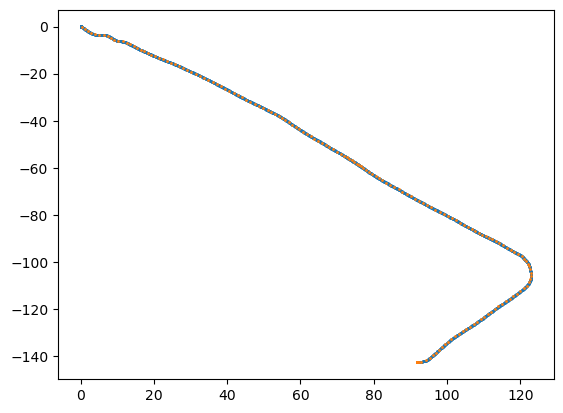

In [11]:
plt.scatter(x1, y1, 1)
plt.scatter(x2, y2, 1)
plt.show()

In [13]:
euler1 = []
for i in range(line1):
    temp_q = [float(datas1[i][4]), float(datas1[i][5]), float(datas1[i][6]), float(datas1[i][7])]
    r = R.from_quat(temp_q)
    temp_euler = r.as_euler('xyz', degrees=True)
    euler1.append(temp_euler)

euler2 = []
for i in range(len(odom)):
    temp_q = [odom[i].pose.pose.orientation.x, odom[i].pose.pose.orientation.y, odom[i].pose.pose.orientation.z, odom[i].pose.pose.orientation.w]
    r = R.from_quat(temp_q)
    temp_euler = r.as_euler('xyz', degrees=True)
    euler2.append(temp_euler)

In [15]:
euler1_ = []
i = 0
while i <= 1809:
    euler1_.append(euler1[i])
    i += 10

len(euler1_)

181

In [18]:
for i in range(100):
    print(euler1_[i][2] - euler2[i][2])

4.377124646828837
-1.443269367849472
-7.935641135859661
-3.1921145988270236
56.07407000979557
43.451645185371106
44.44555850722689
70.54016520127544
57.52305753642795
51.43889165691774
71.4413912682052
91.41541661115372
123.94391735349144
124.74074180012735
133.46069760335268
151.8846458680412
168.22039400841896
177.96448430634396
186.81737714530362
202.88274686869892
-144.44709155053033
-131.6064621677414
-123.48568939499467
-114.0610045706766
-98.17189960368373
-100.39460530599202
-87.2383343025819
-59.29669732892507
-46.544056537362195
-29.411336575689674
-82.33505585385475
-89.17757148016437
-94.52282368997251
-83.22247027613192
-78.91195524864975
-76.6394880361909
-68.1107922183356
-55.193078176862
-39.95490072798946
-19.883893412761573
-16.488617893490073
-8.708741570149343
-1.3606520344740005
2.220631413626208
12.414017473802996
25.901512347004044
32.42156715226538
30.316129590607027
34.86318056890061
49.99215041910804
61.443530427719494
74.63612844592797
86.0734857814926
83.307